# Lesson 7 Assignment - SVM
Version: August-2020

## Author - Priya Asokan

### Instructions
Using the Abalone csv fileLinks to an external site.,  create a new notebook to build an experiment using support vector machine classifier and regression. Perform each of the following tasks and answer the questions:

1. Convert the continuous output value from continuous to binary (0,1) and build an SVC
2. Using your best guess for hyperparameters and kernel, what is the percentage of correctly classified results?
3. Test different kernels and hyperparameters or consider using sklearn.model_selection.SearchGridCV. Which kernel performed best with what settings?
4. Show recall, precision and f-measure for the best model
5. Using the original data, with rings as a continuous variable, create an SVR model
6. Report on the predicted variance and the mean squared error

## Summary
1. Trained SVR model for abalone data. Predicted varaince - 4.7950868017109025, Mean squared Error - 4.918052334637263
2. Converted continous output value from continous to binary. It is changed to a binary Support Vector Classification by assigning examples that are younger than 11 years old to class: ‘0’ and those that are older to class: ‘1’.
3. Trained SVC model.
4. Percentage of correctly classified results(Accuracy) -0.77
5. Kernel - 'Poly' performed well with {'C': 5, 'coef0': 1.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
6. Class 0 - Precision -0.81, Recall- 0.88, F1-Score- 0.84
   Class 1 - Precision -0.70, recall -0.56, F1-Score - 0.62

## Read Data

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score,classification_report
from sklearn.metrics import explained_variance_score

import scipy
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.svm import SVC

In [2]:
SEED = 2005

In [3]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [4]:
# Read CSV file
abalone_df = pd.read_csv('https://raw.githubusercontent.com/PriyaVj-DS/Assignments/master/datasets/Abalone.csv',sep=',')
abalone_df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
abalone_df.shape

(4177, 9)

## Prepare Data

In [6]:
# Check for null values
abalone_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

In [7]:
abalone_df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Rings               int64
dtype: object

In [8]:
abalone_df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [9]:
# label encoder to encode 'Sex' column
le = LabelEncoder()
# Encode single column status
abalone_df.Sex = le.fit_transform(abalone_df.Sex)
# Print df.head for checking the transformation
abalone_df.head()


,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
abalone_df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Rings               int64
dtype: object

## EDA

In [11]:
# Get correlation between numeric variables
abalone_df.corr()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [12]:
abalone_df.corr().loc[:,['Rings']]

,Rings
Sex,-0.034627
Length,0.556720
Diameter,0.574660
Height,0.557467
Whole Weight,0.540390
Shucked Weight,0.420884
Viscera Weight,0.503819
Shell Weight,0.627574
Rings,1.000000


### Data Split for Regression Model

In [13]:
# Seperate train test set
abalone_df_train, abalone_df_test = train_test_split(abalone_df,
                                    test_size = 0.5,
                                    random_state = SEED,
                                    shuffle = True,
                                    stratify = None)


In [14]:
print(abalone_df_train.shape)
print(abalone_df_test.shape)

(2088, 9)
(2089, 9)


In [15]:
# scale numeric features
# sc = StandardScaler()
# sc.fit(abalone_df_train)

In [16]:
print(abalone_df_train)

      Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
2877    1   0.460     0.360   0.140        0.4470          0.1610   
924     1   0.425     0.315   0.100        0.3770          0.1645   
3791    0   0.650     0.495   0.175        1.2270          0.5280   
3475    1   0.400     0.315   0.085        0.2675          0.1160   
1608    1   0.545     0.400   0.130        0.6860          0.3285   
...   ...     ...       ...     ...           ...             ...   
1919    1   0.605     0.490   0.165        1.0710          0.4820   
1385    1   0.630     0.505   0.180        1.2720          0.6025   
665     0   0.395     0.295   0.095        0.2245          0.0780   
3807    0   0.450     0.365   0.115        0.5885          0.3180   
1025    2   0.645     0.520   0.175        1.6360          0.7790   

      Viscera Weight  Shell Weight  Rings  
2877          0.0870        0.1600      9  
924           0.0720        0.1050      6  
3791          0.2580        0.3700     

In [17]:
# Target matrix
y_train = abalone_df_train["Rings"].to_numpy()
y_test = abalone_df_test["Rings"].to_numpy()

In [18]:
# drop original target from dataframe
abalone_df_train = abalone_df_train.drop(["Rings"], axis=1)
abalone_df_test = abalone_df_test.drop(["Rings"], axis=1)

In [19]:
# feature matrix
X_train = abalone_df_train.to_numpy()
X_test = abalone_df_test.to_numpy()

In [20]:
# Get feature names
feature_names = abalone_df_train.columns
feature_names

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

In [21]:
# double check dimensions
print(X_train.shape)
print(X_test.shape)

(2088, 8)
(2089, 8)


### Train a Linear SVM Regressor

In [22]:
# Train a SVR model
regression_model = SVR(kernel='rbf',C=5)
regression_model.fit(X_train,y_train)

SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
# Training score
regression_model.score(X_train,y_train)

0.5499075177078738

In [24]:
# Get prediction values for test data
y_predict = regression_model.predict(X_test)
# Get R squared value for ridge regression
print('Intercept: ', regression_model.intercept_) # pull out intercept
# print('Coefficients: ', regression_model.coef_) # pull out coeffeicients
print('mean squared error: ', mean_squared_error(y_test, y_predict))# Mean squared error
print('R2 score in Test Set: ',  r2_score(y_test, y_predict))# R2 score
print('Predicted varaince score:', np.var(y_test-y_predict))# Varaince score


Intercept:  [10.33454963]
mean squared error:  4.918052334637263
R2 score in Test Set:  0.5229959965115134
Predicted varaince score: 4.7950868017109025


In [25]:
# Adding a constant
X = sm.add_constant(X_test)
# Model fit and summary
model = sm.OLS(y_test,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     280.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):          1.48e-323
Time:                        18:23:14   Log-Likelihood:                -4637.3
No. Observations:                2089   AIC:                             9293.
Df Residuals:                    2080   BIC:                             9343.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2453      0.402      8.082      0.0

## Train a Linear SVM Classifier

## Split Data for a classifier

In [26]:
# Seperate train, tune & test set
abalone_df_train1, abalone_df_tune_test1 = train_test_split(abalone_df,
                                    test_size = 0.3,
                                    random_state = SEED,
                                    shuffle = True,
                                    stratify = None)


In [27]:
# Seperate data into train,tune and test set
abalone_df_tune1, abalone_df_test1 = train_test_split(abalone_df_tune_test1,
                                    test_size = 0.5,
                                    random_state = SEED,
                                    shuffle = True,
                                    stratify = None)

In [28]:
print(abalone_df_train1.shape)
print(abalone_df_tune1.shape)
print(abalone_df_test1.shape)

(2923, 9)
(627, 9)
(627, 9)


In [29]:
# transform target to binary
abalone_df_train1["Rings_classified"] = abalone_df_train1["Rings"].apply(lambda x: 1 if x >= 11 else 0) 
abalone_df_tune1["Rings_classified"] = abalone_df_tune1["Rings"].apply(lambda x: 1 if x >= 11 else 0) 
abalone_df_test1["Rings_classified"] = abalone_df_test1["Rings"].apply(lambda x: 1 if x >= 11 else 0) 

In [30]:
abalone_df_train1

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Rings_classified
2297,2,0.475,0.360,0.120,0.5780,0.2825,0.1200,0.1700,8,0
2383,0,0.525,0.390,0.135,0.6005,0.2265,0.1310,0.2100,16,1
1508,2,0.645,0.510,0.155,1.5390,0.6405,0.3585,0.4300,11,1
1103,0,0.505,0.390,0.125,0.5445,0.2460,0.1500,0.1405,7,0
3927,1,0.500,0.380,0.155,0.6675,0.2745,0.1560,0.1800,12,1
...,...,...,...,...,...,...,...,...,...,...
1919,1,0.605,0.490,0.165,1.0710,0.4820,0.1935,0.3520,10,0
1385,1,0.630,0.505,0.180,1.2720,0.6025,0.2950,0.3150,11,1
665,0,0.395,0.295,0.095,0.2245,0.0780,0.0540,0.0800,10,0
3807,0,0.450,0.365,0.115,0.5885,0.3180,0.1210,0.1325,8,0


In [31]:
# doubel check
print(abalone_df_train1["Rings_classified"].value_counts())
print(abalone_df_train1["Rings_classified"].value_counts(normalize=True))

0    1894
1    1029
Name: Rings_classified, dtype: int64
0    0.647964
1    0.352036
Name: Rings_classified, dtype: float64


In [32]:
# drop original target from dataframe
abalone_df_train1 = abalone_df_train1.drop(["Rings"], axis=1)
abalone_df_tune1 = abalone_df_tune1.drop(["Rings"], axis=1)
abalone_df_test1 = abalone_df_test1.drop(["Rings"], axis=1)

In [33]:
y_train1 = abalone_df_train1["Rings_classified"].to_numpy()
y_tune1 = abalone_df_tune1["Rings_classified"].to_numpy()
y_test1 = abalone_df_test1["Rings_classified"].to_numpy()

In [34]:
# drop target to predict
abalone_df_train1 = abalone_df_train1.drop(["Rings_classified"], axis=1)
abalone_df_tune1 = abalone_df_tune1.drop(["Rings_classified"], axis=1)
abalone_df_test1 = abalone_df_test1.drop(["Rings_classified"], axis=1)

In [35]:
print(abalone_df_train1)

      Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
2297    2   0.475     0.360   0.120        0.5780          0.2825   
2383    0   0.525     0.390   0.135        0.6005          0.2265   
1508    2   0.645     0.510   0.155        1.5390          0.6405   
1103    0   0.505     0.390   0.125        0.5445          0.2460   
3927    1   0.500     0.380   0.155        0.6675          0.2745   
...   ...     ...       ...     ...           ...             ...   
1919    1   0.605     0.490   0.165        1.0710          0.4820   
1385    1   0.630     0.505   0.180        1.2720          0.6025   
665     0   0.395     0.295   0.095        0.2245          0.0780   
3807    0   0.450     0.365   0.115        0.5885          0.3180   
1025    2   0.645     0.520   0.175        1.6360          0.7790   

      Viscera Weight  Shell Weight  
2297          0.1200        0.1700  
2383          0.1310        0.2100  
1508          0.3585        0.4300  
1103          0.1500   

In [36]:
# scale numeric features
sc = StandardScaler()
sc.fit(abalone_df_train1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
print(abalone_df_train1)

      Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
2297    2   0.475     0.360   0.120        0.5780          0.2825   
2383    0   0.525     0.390   0.135        0.6005          0.2265   
1508    2   0.645     0.510   0.155        1.5390          0.6405   
1103    0   0.505     0.390   0.125        0.5445          0.2460   
3927    1   0.500     0.380   0.155        0.6675          0.2745   
...   ...     ...       ...     ...           ...             ...   
1919    1   0.605     0.490   0.165        1.0710          0.4820   
1385    1   0.630     0.505   0.180        1.2720          0.6025   
665     0   0.395     0.295   0.095        0.2245          0.0780   
3807    0   0.450     0.365   0.115        0.5885          0.3180   
1025    2   0.645     0.520   0.175        1.6360          0.7790   

      Viscera Weight  Shell Weight  
2297          0.1200        0.1700  
2383          0.1310        0.2100  
1508          0.3585        0.4300  
1103          0.1500   

In [38]:
# feature matrix
X_train1 = abalone_df_train1.to_numpy()
X_tune1 = abalone_df_tune1.to_numpy()
X_test1 = abalone_df_test1.to_numpy()

### SVM Classifier

In [39]:
# fit linear SVM classifier
estimator=LinearSVC(random_state=SEED, verbose=0)

estimator.fit(X_train1, y_train1)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=2005, tol=0.0001,
          verbose=0)

In [40]:
# predict class label on tune set
y_tune_pred = estimator.predict(X_tune1)

In [41]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_tune1, y_pred=y_tune_pred)
print(cm)

# calculate accuracy 
accuracyScore = accuracy_score(y_true=y_tune1, y_pred=y_tune_pred)
print('Accuracy of Tune Set : ' + str(accuracyScore))

# comprehensive classification report
print(classification_report(y_true=y_tune1, y_pred=y_tune_pred))

[[368  45]
 [ 94 120]]
Accuracy of Tune Set : 0.7783094098883573
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       413
           1       0.73      0.56      0.63       214

    accuracy                           0.78       627
   macro avg       0.76      0.73      0.74       627
weighted avg       0.77      0.78      0.77       627



### Grid search for hyper-parameter tuning in SVM

In [42]:
# Concatenate train and tune to form the split index
X_train_tune = np.concatenate([X_train1, X_tune1])
y_train_tune = np.concatenate([y_train1, y_tune1])
split_index = np.concatenate([np.repeat(-1, X_train1.shape[0]), np.repeat(0, X_tune1.shape[0])])

In [43]:
# double check dimensions
print(X_train1.shape)
print(X_tune1.shape)
print(X_train_tune.shape)

(2923, 8)
(627, 8)
(3550, 8)


In [44]:
# grid search
grid = GridSearchCV(
    estimator=SVC(probability=True, random_state=SEED, verbose=0),
    param_grid={
        "C": [0.1, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5],
        "kernel": ["linear", "poly", "rbf"],
        "degree": [2, 3, 4, 5],
        "gamma": ["scale", "auto"],
        "coef0": [0.0, 0.5, 1.0]
    },
    scoring="roc_auc",
    n_jobs=10,
    cv=PredefinedSplit(split_index), # this uses tune set for hyper-parameter tuning
    verbose=1,
    refit=True
)

# fit in training data, and select hyper-parameters in tune data
grid.fit(X_train_tune, y_train_tune)

Fitting 1 folds for each of 648 candidates, totalling 648 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   29.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  4.3min
[Parallel(n_jobs=10)]: Done 648 out of 648 | elapsed:  7.2min finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=2005, shrinking=True,
                           tol=0.001, verbose=0),
             iid='deprecated', n_jobs=10,
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5],
                         'coef0': [0.0, 0.5, 1.0], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [45]:
# output detailed validation results
print(grid.cv_results_)

{'mean_fit_time': array([ 5.13868785,  6.86601377,  9.7190001 ,  5.51449418,  7.35637546,
        9.85355115,  5.97399449,  7.27066064,  9.78127837,  5.86535239,
        6.80835867,  9.25025439,  4.68037248,  8.41002631, 10.30769062,
        5.34368277,  7.78411579, 11.00213838,  5.75987434,  4.27084804,
       10.59352064,  6.12168646,  7.8989687 ,  3.34403753,  1.90165019,
        6.24393678, 10.14404249,  5.20141792,  2.34692812, 11.20899844,
        2.29042435,  4.4287951 ,  2.78471994,  5.54013944,  1.94102764,
       12.37940812,  3.87917447,  9.66044593, 12.62707186,  2.58349895,
        2.84961224, 12.73471284,  7.13229132,  4.60320926, 10.81200528,
        2.59484935,  8.93228173,  4.38794184,  6.2481842 ,  2.67261004,
        9.95587015,  5.33287263,  2.3082931 ,  8.51116252,  4.99650693,
        1.88271308,  9.67486286,  1.54683423,  6.6030581 ,  7.11235452,
        5.12447023,  2.26864552,  2.85851192,  2.21029997,  6.92485499,
        3.39255357,  5.67386198,  9.29099131, 

In [46]:
# put validation results in a better format
pd.DataFrame(grid.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_coef0,param_degree,param_gamma,param_kernel,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,5.138688,0.0,0.466955,0.0,0.1,0,2,scale,linear,"{'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma':...",0.807427,0.807427,0.0,562
1,6.866014,0.0,0.178403,0.0,0.1,0,2,scale,poly,"{'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma':...",0.828155,0.828155,0.0,507
2,9.719000,0.0,0.288038,0.0,0.1,0,2,scale,rbf,"{'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma':...",0.789301,0.789301,0.0,614
3,5.514494,0.0,0.133553,0.0,0.1,0,2,auto,linear,"{'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma':...",0.807427,0.807427,0.0,562
4,7.356375,0.0,0.184384,0.0,0.1,0,2,auto,poly,"{'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma':...",0.762689,0.762689,0.0,645


In [47]:
# best estimator determined by GridSearchCV
estimator_best = grid.best_estimator_
print(estimator_best)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=1.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=2005, shrinking=True, tol=0.001,
    verbose=0)


In [48]:
# best validation score
print(grid.best_score_)

0.8571654861849698


In [49]:
# best hyper-parameters selected
print(grid.best_params_)

{'C': 5, 'coef0': 1.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [50]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_tune1, y_pred=y_tune_pred)
print(cm)

# calculate accuracy 
accuracyScore = accuracy_score(y_true=y_tune1, y_pred=y_tune_pred)
print('Accuracy of Tune Set : ' + str(accuracyScore))

# comprehensive classification report
print(classification_report(y_true=y_tune1, y_pred=y_tune_pred))

[[368  45]
 [ 94 120]]
Accuracy of Tune Set : 0.7783094098883573
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       413
           1       0.73      0.56      0.63       214

    accuracy                           0.78       627
   macro avg       0.76      0.73      0.74       627
weighted avg       0.77      0.78      0.77       627



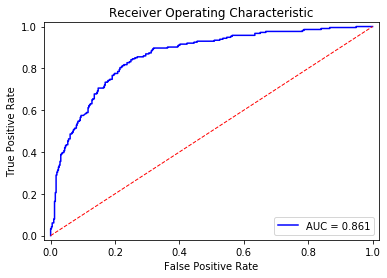

In [51]:
# predict probability on tune set
y_tune_prob = estimator_best.predict_proba(X_tune1)[:,1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_tune1, y_score=y_tune_prob)
roc_auc = roc_auc_score(y_true=y_tune1, y_score=y_tune_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

### Use Joblib to import models

In [52]:
import joblib
# export
joblib.dump(estimator_best, "estimator_best_abalone.joblib")

['estimator_best_abalone.joblib']

### Model Performance in  test set from best model selected

In [53]:
# import the saved model
estimator_best_load = joblib.load("estimator_best_abalone.joblib")

In [54]:
# you can confirm that model parameters are the same as printed above
estimator_best_load

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=1.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=2005, shrinking=True, tol=0.001,
    verbose=0)

In [55]:
# predict class label on test set
y_test1_pred = estimator_best_load.predict(X_test1)

In [56]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_test1, y_pred=y_test1_pred)
print(cm)

[[374  49]
 [ 90 114]]


In [57]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_test1, y_pred=y_test1_pred)
print(cm)

# calculate accuracy 
accuracyScore = accuracy_score(y_true=y_test1, y_pred=y_test1_pred)
print('Accuracy of Test Set : ' + str(accuracyScore))

# comprehensive classification report
print(classification_report(y_true=y_test1, y_pred=y_test1_pred))

[[374  49]
 [ 90 114]]
Accuracy of Test Set : 0.7783094098883573
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       423
           1       0.70      0.56      0.62       204

    accuracy                           0.78       627
   macro avg       0.75      0.72      0.73       627
weighted avg       0.77      0.78      0.77       627



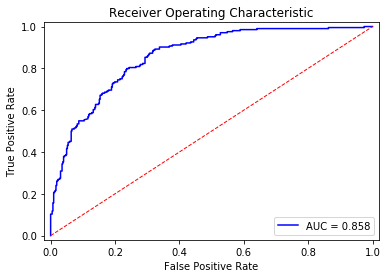

In [58]:
# predict probability on tune set
y_test1_prob = estimator_best.predict_proba(X_test1)[:,1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_test1, y_score=y_test1_prob)
roc_auc = roc_auc_score(y_true=y_test1, y_score=y_test1_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()